## Midterm - Numerical Project

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
# time index for the data 
time_index = np.arange(0.01, 1.01, 0.01)

In [4]:
# standard brownian motion covariance matrix 
bm_cov = np.reshape(np.array([i if i < j else j for j in time_index for i in time_index]), (100,100))

In [5]:
# the standard brownian motion to be implemented 
brownian_motion = np.insert(np.array([np.linalg.cholesky(bm_cov).dot(np.random.normal(loc=0, 
                                                                                      scale=1, 
                                                                                      size=100)) for _ in range(10)]), 
                            obj=0, 
                            values=0,
                            axis=1)

In [6]:
# standard base exponential used for e^(t/2)
e_base = np.array([math.exp(i/2) for i in np.insert(time_index,0,0)])

##### $$X_t = e^{\ t \ / \ 2}cos \ B_t$$

a) Plot 10 paths of the process $X_t$ on $[0, 1]$ with discretization of $1/100$

In [7]:
X_t = e_base * np.cos(brownian_motion)

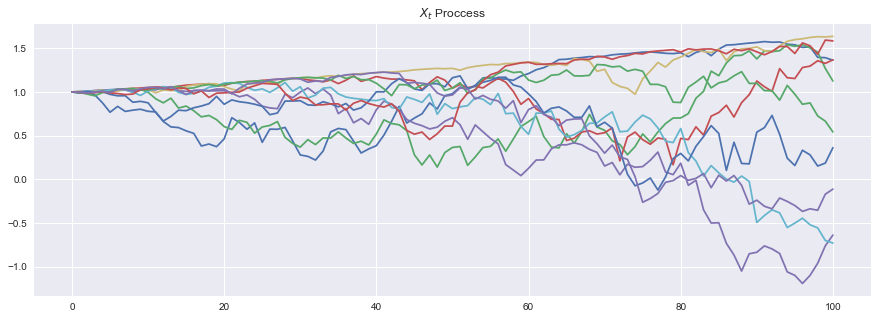

In [8]:
plt.figure(figsize=(15,5))
plt.title("$X_t$ Proccess")
for  i in X_t:
    plt.plot(i)

##### $$Y_t = 1 - \int_{0}^{t} e^{\ s \ / \ 2}sin \ B_s \ dB_s$$

b) Plot 10 paths of the process $Y_t$ on $[0, 1]$ with discretization of $1/100$ (same brownian path)

In [27]:
Y_t = 1 - (e_base[:-1] * np.delete(np.sin(brownian_motion), 100, axis=1) * np.apply_over_axes(func=np.cumsum, 
                                                                                              a=np.delete(np.roll(brownian_motion,-1) - brownian_motion, 
                                                                                                          obj=100, axis=1),
                                                                                              axes=1))

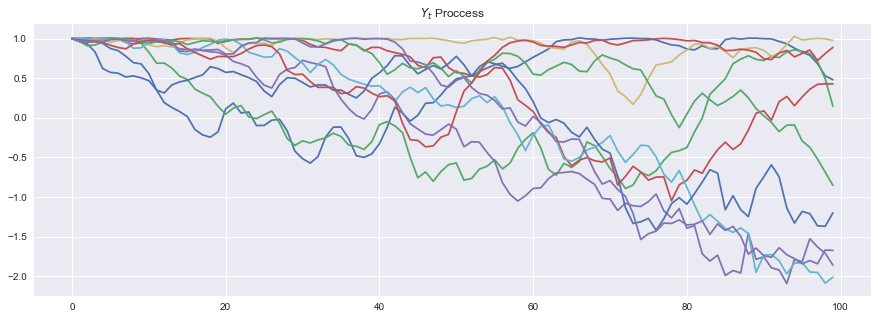

In [28]:
plt.figure(figsize=(15,5))
plt.title("$Y_t$ Proccess")
for i in Y_t:
    plt.plot(i)

c) Plot the paths of the two processes on the same graph.

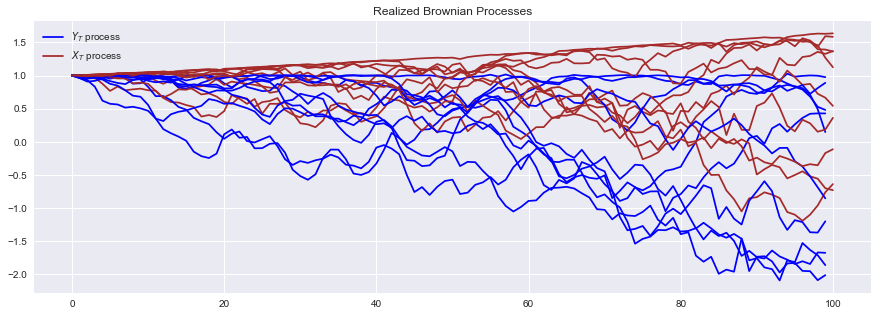

In [11]:
plt.figure(figsize=(15,5))
plt.title("Realized Brownian Processes")
for i in range(10):
    plt.plot(Y_t[i], color='blue', label="Y_T")
    plt.plot(X_t[i], color='brown', label="X_T")
plt.legend(['$Y_T$ process', '$X_T$ process'])

d) Estimate the error between the two processes given by $E[|X_1-Y_1|]$ by doing the empirical average of $|X_1 - Y_1|$ on 10 paths, 100 paths and 1000 paths.

In [12]:
def error(N: int = 10, bm_cov: np.array = None, exp_base: np.array = None) -> np.float64:
    """
    Calculating the abosulte error between the X_t and Y_t proccesses 
    :param N: the number of paths to generate 
    :param bm_cov: numpy array storing the covariance matrix of a standard brownian motion
    :param exp_base: numpy array storing the exponetial component of the process
    :return: the average of proccess difference
    """
    
    # the standard brownian motion to be implemented 
    brownian_motion = np.insert(np.array([np.linalg.cholesky(bm_cov).dot(np.random.normal(loc=0, 
                                                                                          scale=1, 
                                                                                          size=100)) for _ in range(N)]), 
                                obj=0, 
                                values=0,
                                axis=1) 
    
    
    # calculate the X_t process 
    X_t = np.delete(exp_base * np.cos(brownian_motion), obj=100, axis=1) 
    
    # calculate the Y_t process
    Y_t = 1 - (e_base[:-1] * np.delete(np.sin(brownian_motion), 100, axis=1) * np.apply_over_axes(func=np.cumsum, a=np.delete(np.roll(brownian_motion,-1) - brownian_motion, obj=100, axis=1), axes=1))
    
    return np.average(np.absolute(X_t - Y_t))
    

In [13]:
print("Our error Terms are as follows")
print("==============================================================")
for path in [10, 100, 1000]:
    print("The error between $X_t$ and $Y_t$ with {n} paths is {e}".format(n=path, e=round(error(path, bm_cov, e_base),4)))
    print("-------------------------------------------")

Our error Terms are as follows
The error between $X_t$ and $Y_t$ with 10 paths is 0.45
-------------------------------------------
The error between $X_t$ and $Y_t$ with 100 paths is 0.5078
-------------------------------------------
The error between $X_t$ and $Y_t$ with 1000 paths is 0.5061
-------------------------------------------
